In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import importlib

import spatial_filter as sf # importing spatial filters library

In [6]:
im1 = cv2.cvtColor(cv2.imread('./my_photos/sample1.jpg'), cv2.COLOR_BGR2GRAY)

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


True

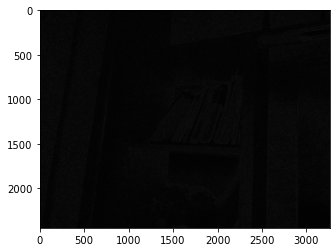

In [7]:
importlib.reload(sf)

lap_val = 10
laplacian = sf.laplacian(im1 , lap_val)
plt.imshow(laplacian , cmap="gray")
laplacian += im1[im1.shape[0] - laplacian.shape[0]:,im1.shape[1] - laplacian.shape[1]:]
cv2.imwrite(f'noise_removal_results/laplacian{lap_val}_sample1.jpg', laplacian)

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


True

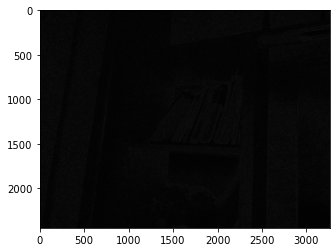

In [15]:
importlib.reload(sf)

lap_val = 10
laplacian = sf.laplacian(im1 , lap_val)
plt.imshow(laplacian , cmap="gray")
laplacian += im1[im1.shape[0] - laplacian.shape[0]:,im1.shape[1] - laplacian.shape[1]:]
cv2.imwrite(f'noise_removal_results/laplacian2_{lap_val}_sample1.jpg', laplacian)

[[ 41  41  40 ...  38  41  43]
 [ 42  42  41 ...  37  41  44]
 [ 46  46  43 ...  36  40  44]
 ...
 [ 46  46  50 ... 165 163 163]
 [ 40  41  48 ... 165 164 163]
 [ 36  39  49 ... 165 163 162]]
[[ -4  -3  -4 ...  -6   3  -5]
 [  2   0   4 ...  -9   3   7]
 [ -3  -6   1 ...  -3  -3  14]
 ...
 [ 28  -7  -8 ...   0  -1   1]
 [ -2 -11   3 ...   6   3  -1]
 [  4 -16 -10 ...  -5  -5  -3]]
diff max 140
[[ 33  35  32 ...  26  47  33]
 [ 46  42  49 ...  19  47  58]
 [ 40  34  45 ...  30  34  72]
 ...
 [102  32  34 ... 165 161 165]
 [ 36  19  54 ... 177 170 161]
 [ 44   7  29 ... 155 153 156]]
364


True

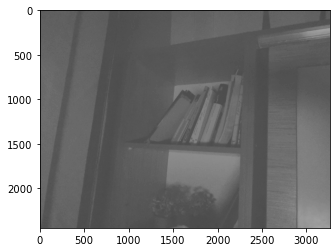

In [10]:
importlib.reload(sf)

gwindow = 9
alpha = 1
high_boosted = sf.high_boost_filter(laplacian , gwindow , alpha)

print(high_boosted)
print(high_boosted.max())
plt.imshow(high_boosted , cmap="gray")
cv2.imwrite(f'noise_removal_results/hb_sample1_gwindow{gwindow}_alpha{alpha}.jpg', high_boosted)

In [12]:
print(laplacian)
print(laplacian.dtype)

[[ 37  38  36 ...  32  78  50]
 [ 91  58  89 ...  28  85  98]
 [ 43  40 110 ...  77  37 124]
 ...
 [252  39  42 ... 190 162 164]
 [ 38  39  51 ... 221 198 162]
 [ 40  98  39 ... 160 158 159]]
uint8


[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
[[ 6.35609943  2.43310501  1.0198039  ...  2.60768096 10.8
   1.26491106]
 [ 4.42718872  1.64924225  3.4525353  ...  2.82842712  8.08949937
   3.11126984]
 [ 5.26117858  4.04969135  3.2984845  ...  0.84852814  7.24430811
   6.11882342]
 ...
 [ 6.88767014  6.20322497  7.9397733  ...  2.43310501  3.31058907
   1.64924225]
 [ 6.10573501  6.8         5.05964426 ...  1.6         3.16227766
   0.63245553]
 [ 5.9464275  11.26410227 10.43072385 ...  4.          3.67695526
   2.91204396]]
[[ 43.35609943  40.43310501  37.0198039  ...  34.60768096  46.8
   34.26491106]
 [ 41.42718872  41.64924225  39.4525353  ...  30.82842712  46.08949937
   41.11126984]
 [ 48.26117858  44.04969135  33.2984845  ...  30.84852814  44.24430811
   45.11882342]
 ...
 [ 45.88767014  45.20322497  49.9397733  ... 165.43310501 164.31058907
  165.64924225]
 [ 44.10573501  36.8         56.05964426 ... 161.6        162.16227766
  162.63245553]
 [ 45.94

True

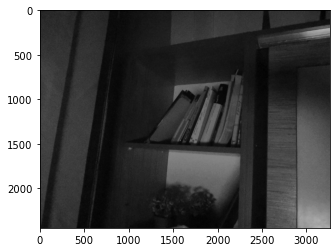

In [14]:
importlib.reload(sf)
result = sf.sobel_operator(im1)
result *= 1.6
print(result)
result += im1[im1.shape[0] - result.shape[0]:,im1.shape[1] - result.shape[1]:]
print(result)
result = result.astype(np.uint8)

plt.figure()

plt.imshow(result , cmap='gray')
cv2.imwrite(f'noise_removal_results/sample1_sobel.jpg', result)